# Health Insurance Cost Prediction
-----

## General Information
-----
### -> Problem Description
* Identifying the cost of health insurance policy that should be applied by a person, based on their characteristics.

### -> Dataset Information
* The dataset used for this problem is downloaded from Kaggle.
* The dataset is based on the Insurance Premium Charges in US
* This dataset contains 1338 rows of insured data, where the Insurance charges are given against the following attributes of the insured:
    * Age
    * Sex
    * BMI
    * Number of Children
    * Smoker
    * Region
* There are no missing or undefined values in the dataset.
* **Dataset Link:** <a href= "https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset">https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset</a>

### -> Libraries Used
* Numpy
* Pandas
* Matplotlib
* Seaborn
* Sklearn

### -> Models Tried:
* RandomForestRegressor
* DecisionTreeRegressor
* LinearRegression
* SVR
* XGBRegressor
* XGBRFRegressor

### -> Evaluation Metrics Used
* Since it is a Regression based problem, the following metrics are used:
    * R2 Score
    * Mean Absolute Error
    * Mean Squared Error
    * Cross Validated R2 Score
    * Cross Validated Mean Absolute Error
    * Cross Validated Mean Squared Error


## 1. Importing The Required Libraries
---

In [1]:
# to manipulate the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ML models
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import xgboost as xgb

In [3]:
# for splitting the data into train and test sets
from sklearn.model_selection import train_test_split

# for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [4]:
# evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

## 2. Loading the Dataset
---

In [6]:
# reading data from the dataset and storing it as a dataframe
df = pd.read_csv("D:/Programs/Health Insurance Prediction/Health Insurance Prediction (XGB)/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df["age"].dtype

dtype('int64')

In [8]:
# viewing the shape of the dataframe
df.shape

(1338, 7)

In [9]:
max(df["bmi"]), min(df["bmi"])

(53.13, 15.96)

In [10]:
# checking for null values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
# checking the datatypes of each column
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [12]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

### 2.1. Plotting Information about the data

In [13]:
# plotting a bar chart for the passed values
def plot_bar_chart(X, y, xlabel, ylabel):
    title = str(xlabel+" vs. "+ylabel,)
    plt.bar(df["age"], df["charges"])
    plt.title(title+"\n")
    plt.xlabel("\n"+xlabel)
    plt.ylabel(ylabel+"\n");

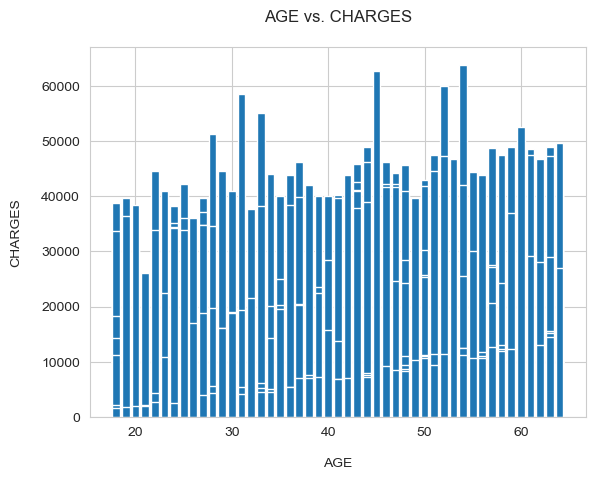

In [14]:
# age vs charges
plot_bar_chart(df["age"], df["charges"],"AGE", "CHARGES")

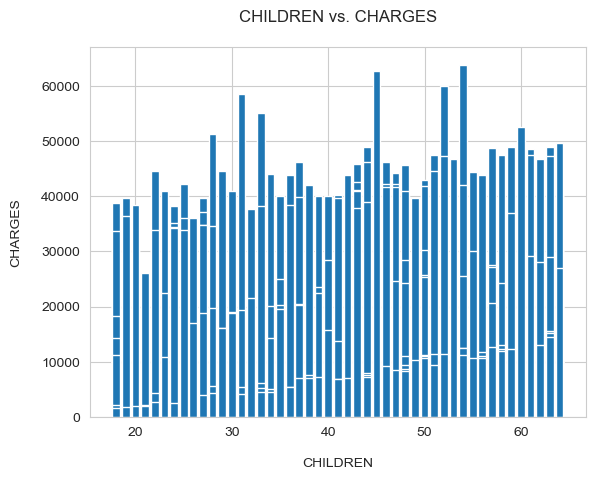

In [15]:
# children vs charges
plot_bar_chart(df["children"], df["charges"],"CHILDREN", "CHARGES")

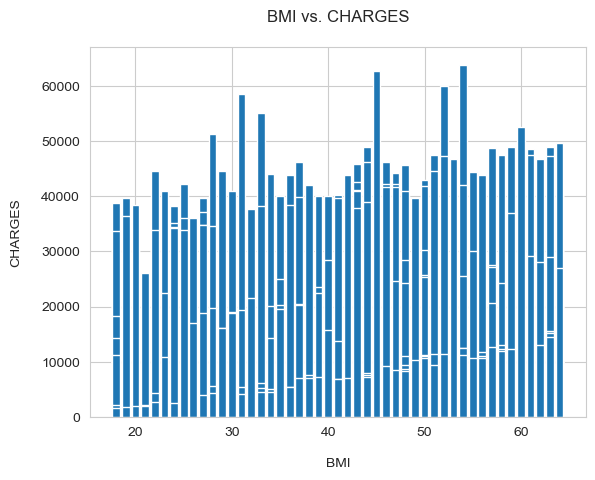

In [16]:
# bmi vs charges
plot_bar_chart(df["bmi"], df["charges"],"BMI", "CHARGES")

## 3. Preprocessing the Data
---

In [17]:
# taking a copy of the original dataframe
temp_df = df.copy(deep=False)

# Turning the categorical columns into numbers
temp_df["sex"] = pd.Categorical(df["sex"]).codes.astype("float")
temp_df["smoker"] = pd.Categorical(df["smoker"]).codes.astype("float")
temp_df["region"] = pd.Categorical(temp_df["region"]).codes.astype("float")+1
temp_df["children"] = temp_df["children"].astype("float")
temp_df["age"] = temp_df["age"].astype("float")

# viewing the dataframe
temp_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,0.0,27.900,0.0,1.0,4.0,16884.92400
1,18.0,1.0,33.770,1.0,0.0,3.0,1725.55230
2,28.0,1.0,33.000,3.0,0.0,3.0,4449.46200
3,33.0,1.0,22.705,0.0,0.0,2.0,21984.47061
4,32.0,1.0,28.880,0.0,0.0,2.0,3866.85520


In [18]:
# original data is unaffected
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [19]:
# datatypes of all the columns are converted into float
temp_df.dtypes

age         float64
sex         float64
bmi         float64
children    float64
smoker      float64
region      float64
charges     float64
dtype: object

In [20]:
temp_df["region"].value_counts()

3.0    364
4.0    325
2.0    325
1.0    324
Name: region, dtype: int64

In [21]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [22]:
# Splitting features and target
X = temp_df.drop(["charges"], axis=1)
y = df["charges"]
X.shape, y.shape

((1338, 6), (1338,))

### 3.1. Correlation Matrix

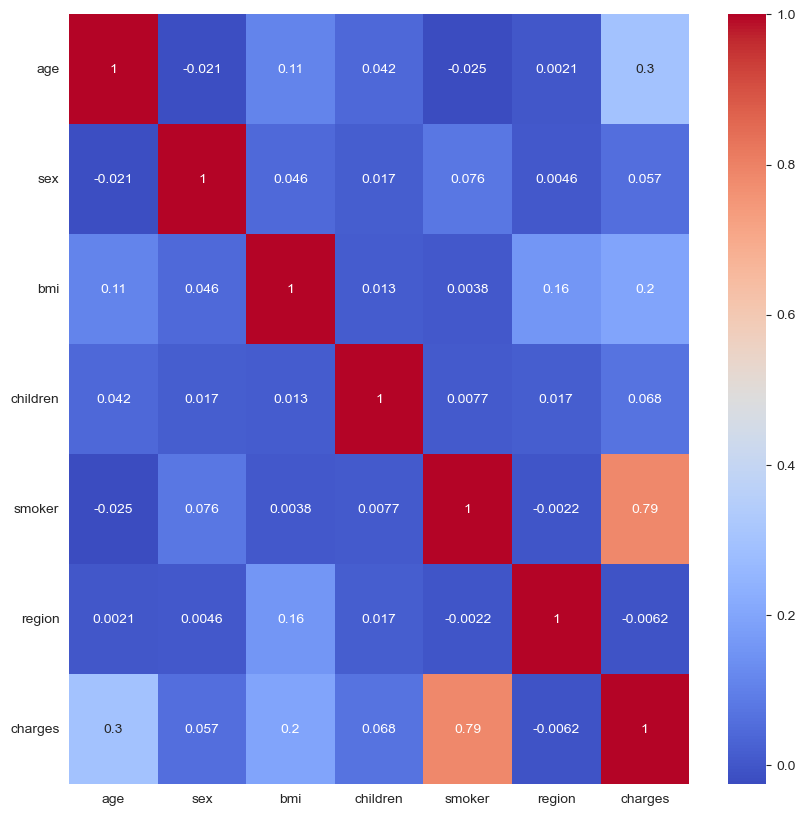

In [23]:
# plotting a Correlation Matrix
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(temp_df.corr(), annot=True, cmap="coolwarm")
plt.yticks(rotation=0);
# based on the color of the squares, feature's correlation with target can be identified

In [24]:
# removing the features that are negatively correlated with the target
X = X.drop(["region"], axis=1)
X.head()

,age,sex,bmi,children,smoker
0,19.0,0.0,27.900,0.0,1.0
1,18.0,1.0,33.770,1.0,0.0
2,28.0,1.0,33.000,3.0,0.0
3,33.0,1.0,22.705,0.0,0.0
4,32.0,1.0,28.880,0.0,0.0


### 3.2. Splitting the data into Train and Test Splits

In [25]:
# splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True ,random_state=42)
len(X_train), len(X_test)

(1070, 268)

In [26]:
X_train[:3]

,age,sex,bmi,children,smoker
560,46.0,0.0,19.95,2.0,0.0
1285,47.0,0.0,24.32,0.0,0.0
1142,52.0,0.0,24.86,0.0,0.0


In [27]:
type(X_train)

pandas.core.frame.DataFrame

## 4. Evaluating Models
---

In [28]:
# creating a metrics dataframe to store the results
metrics_df = pd.DataFrame(columns=["RandomForestRegressor", "DecisionTreeRegressor", "LinearRegression", "SVR", "XGBRegressor", "XGBRFRegressor"],
                          index=["R2_Score", "Mean_absolute_error","Mean_squared_error", "cross_val_r2_score","cross_val_mae", "cross_val_mse"])

In [29]:
np.random.seed=42
# creating a dictionary of models to iterate over each model
models = {
    "RandomForestRegressor": RandomForestRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "LinearRegression": LinearRegression(),
    "SVR": SVR(),
    "XGBRegressor": xgb.XGBRegressor(),
    "XGBRFRegressor": xgb.XGBRFRegressor()
}

# iterating over the models dictionary
for key, value in models.items():
    # fitting the model
    value.fit(X_train, y_train)
    # making predictions
    y_preds = value.predict(X_test)

    # calculating the evaluation metrics to determine which model performs best out of selected models
    # calculating 5-fold cross validated r2_score, mean_absolute_error, mean_squared_error
    cv_r2_score = abs(np.mean(cross_val_score(value, X_test, y_test, cv=5, scoring="r2")))
    cv_mae_score = abs(np.mean(cross_val_score(value, X_test, y_test, cv=5, scoring="neg_mean_absolute_error")))
    cv_mse_score = abs(np.mean(cross_val_score(value, X_test, y_test, cv=5, scoring="neg_mean_squared_error")))

    # calculating r2_score, mean_absolute_error, mean_squared_error without cross validation
    metrics_df[key] = [float(f"{r2_score(y_test, y_preds):.4f}")*100,
                     f"{mean_absolute_error(y_test, y_preds):.4f}",
                    f"{mean_squared_error(y_test, y_preds):.4f}",
                     #  None, None, None]
                    float(f"{cv_r2_score:.4f}")*100, f"{cv_mae_score:.4f}", f"{cv_mse_score:.4f}"]

metrics_df


,RandomForestRegressor,DecisionTreeRegressor,LinearRegression,SVR,XGBRegressor,XGBRFRegressor
R2_Score,85.59,69.07,78.11,-7.22,82.61,87.34
Mean_absolute_error,2555.2637,3177.9403,4213.4848,8590.1336,2791.9041,2499.9104
Mean_squared_error,22373321.7801,48021295.4394,33979257.0508,166462302.7100,26991660.0470,19658301.5348
cross_val_r2_score,85.5,73.45,75.97,13.77,83.31,85.88
cross_val_mae,2471.0713,2904.3011,4182.3230,8588.3776,2711.4788,2483.0814
cross_val_mse,21873015.1144,38368496.2184,35936487.4492,175413940.8728,25782673.5984,21573077.4590


* **The XGBRFRegressor Model performs well than all the other models**

## 5. Hyperparameter Tuning
---

* We choose the **XGBRFRegressor model** for hyperparameter tuning

In [30]:
# setting random seed
np.random.seed=42
model = xgb.XGBRFRegressor(random_state=42)

# getting the model's hyperparameters in order to tune them
model.get_params()

{'colsample_bynode': 0.8,
 'learning_rate': 1.0,
 'reg_lambda': 1e-05,
 'subsample': 0.8,
 'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 42,
 'reg_alpha': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

### 5.1. Performing GridSearchCV

In [31]:
# Creating a parameter grid to try out different combinations of hyperparameters
param = {
    'max_depth': [None, 4],
    'n_estimators': np.arange(10, 100, 10),
    'tree_method': [None, "auto", "exact"],
}

gd = GridSearchCV(model, param, cv=5, n_jobs=-1)
gd.fit(X_train, y_train)

# getting the best score obtained by GridSearchCV
gd.best_score_*100

84.84109888751075

In [32]:
# getting the best parameters obtained by performing GridSearchCV
gd.best_params_

{'max_depth': 4, 'n_estimators': 90, 'tree_method': None}

In [33]:
# testing out the best parameters obtained by GridSearchCV on test data
temp_model = xgb.XGBRFRegressor(
    tree_method = None,
    n_estimators = 90,
    max_depth = 4,
    random_state=42
)
# fitting the model
temp_model.fit(X_train, y_train)

# scoring the tuned model on test data
temp_model.score(X_test, y_test)*100, np.mean(cross_val_score(temp_model, X_test, y_test, cv=5))*100

(87.23782864567097, 86.78214123098505)

## 6. Creating a Final model and Exporting it
---

In [34]:
temp_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,0.0,27.900,0.0,1.0,4.0,16884.92400
1,18.0,1.0,33.770,1.0,0.0,3.0,1725.55230
2,28.0,1.0,33.000,3.0,0.0,3.0,4449.46200
3,33.0,1.0,22.705,0.0,0.0,2.0,21984.47061
4,32.0,1.0,28.880,0.0,0.0,2.0,3866.85520


In [35]:
# creating a final model from the hyperparameters obtained by performing GridSearchCV
final_model = xgb.XGBRegressor(
    tree_method = None,
    n_estimators = 90,
    max_depth = 4,
    random_state=42
)

# since this is the final model that we are going to deploy we train it with all the data
final_model.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=90, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [37]:
# for exporting our model
import pickle

# saving the model
pickle.dump(final_model, open("D:/Programs/Health Insurance Prediction/Health Insurance Prediction (XGB)/predictor.sav", "wb"))

In [38]:
# loading the saved model to check if it is properly saved
loaded_model = pickle.load(open("D:/Programs/Health Insurance Prediction/Health Insurance Prediction (XGB)/predictor.sav", "rb"))

loaded_model.score(X_test, y_test)*100
# The model is working good

95.87303559705352

In [39]:
# xgb model require this special function to save and load
final_model.save_model("predictor.json")

In [40]:
loaded_model = xgb.XGBRFRegressor()
loaded_model.load_model("predictor.json")
loaded_model.score(X_test, y_test)*100

95.87303559705352

In [41]:
metrics_df

,RandomForestRegressor,DecisionTreeRegressor,LinearRegression,SVR,XGBRegressor,XGBRFRegressor
R2_Score,85.59,69.07,78.11,-7.22,82.61,87.34
Mean_absolute_error,2555.2637,3177.9403,4213.4848,8590.1336,2791.9041,2499.9104
Mean_squared_error,22373321.7801,48021295.4394,33979257.0508,166462302.7100,26991660.0470,19658301.5348
cross_val_r2_score,85.5,73.45,75.97,13.77,83.31,85.88
cross_val_mae,2471.0713,2904.3011,4182.3230,8588.3776,2711.4788,2483.0814
cross_val_mse,21873015.1144,38368496.2184,35936487.4492,175413940.8728,25782673.5984,21573077.4590


In [81]:
perf = metrics_df["XGBRFRegressor"].astype("float").drop(labels=["cross_val_mae", "cross_val_mse", "Mean_squared_error", "Mean_absolute_error"])
perf

R2_Score              87.34
cross_val_r2_score    85.88
Name: XGBRFRegressor, dtype: float64

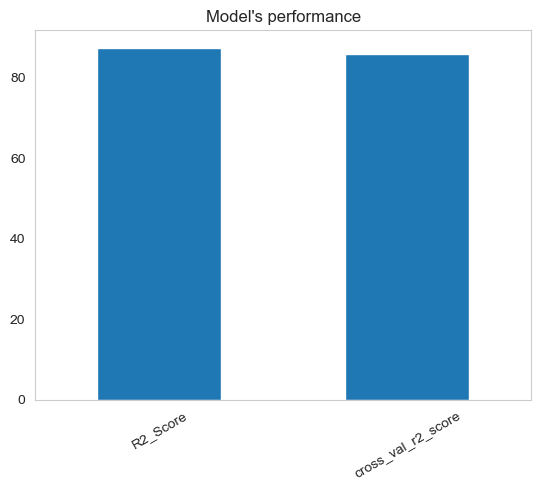

In [83]:
perf.plot.bar()
plt.title("Model's performance")
plt.xticks(rotation=30)
plt.grid(False);